In [1]:
#Opening the Ratebeer:
import tarfile

# Replace 'your_archive.tar' with the path to your .tar file
archive_path = 'RateBeer.tar.gz'

# Open the .tar file
with tarfile.open(archive_path, 'r') as tar:
    # Extract all the contents to a directory (you can specify a different directory)
    tar.extractall()


In [2]:
import pandas as pd
reviews = open('reviews.txt.gz','r')
breweries = pd.read_csv('breweries.csv')
users = pd.read_csv('users.csv')
beers = pd.read_csv('beers.csv', sep=',')
# ratings = pd.read_csv('ratings.txt', sep=',')  THIS ONE REQUIRES FURTHER PREPROCESSING


In [4]:
beers.nbr_matched_valid_ratings.unique()

array([   0,    6,    4,    3,    1,   21,    7,    9,   16,   38,   29,
          5,   11,    8,    2,   23,   13,   19,   12,   89,   74,   18,
         10,   15,   14,  115,   25,   34,   17,   28,   69,   75,   46,
        102,   55,   26,   33,   87,   57,  178,  198,   66,   30,  293,
         42,   88,   20,   37,   27,  321,   53,  108,   50,   24,  118,
        106,  125,   56,   41,   84,   81,   60,   98,  104,   32,   54,
        168,  161,  110,   77,  140,   64,   43,   44,   36,   39,   49,
         47,   58,   59,   22,   35,   48,   70,   62,   96,   45,  119,
         31,  144,   83,  113,  141,   51,  116,  186,  182,  111,  101,
         40,  288,   68,  210,  373,  206,  534,  319,   63,  311,  114,
         67,   72,  211,   52,   86,   80,  103,   61,   85,  107,  289,
        271,  215,  181,  359,  201,   79,  105,   93,   95,  155,  192,
        156,   65,   71,  157,   73,   82,   78,  203,   91,   90,  189,
        184,  120,  139,  356,  313,  510,  109,  1

In [3]:
display(beers)
display(breweries)
display(users)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN


,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1


,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany
...,...,...,...,...,...
70169,1,134893,stamfordbus,1.315217e+09,England
70170,1,327816,fobia405,1.406282e+09,Belgium
70171,1,183139,junkin,1.339841e+09,NaN
70172,3,82020,klesidra,1.222250e+09,Slovenia


<Axes: ylabel='Frequency'>

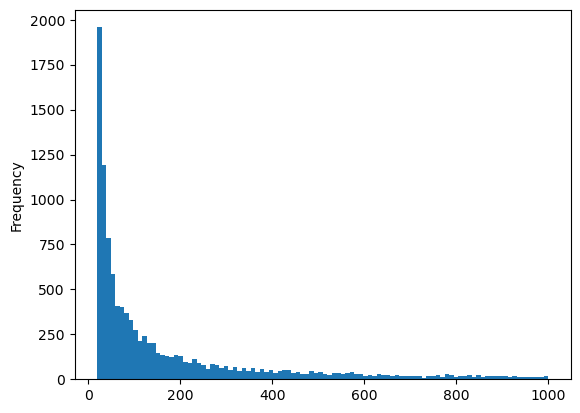

In [10]:
users['nbr_ratings'].sort_values(ascending=False).plot(kind='hist', range = (20,1000), bins= 100)
# average rating/ overall rating in time